### This displaying captures frames into a video

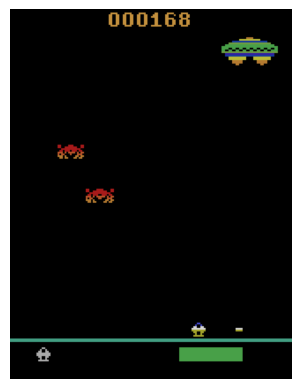

In [ ]:
# Prompt for this:
# After saving the model: "model.save("custom_riverraid_v5_ppo")"
# I want to have another python script (.py), where I load this model and allow the agent 
# to play the game, render mode = human

# the usual thing with GPT code -> fix the ale_py import 
import gymnasium as gym
import ale_py
gym.register_envs(ale_py)
import time
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from gymnasium.wrappers import RecordVideo
from IPython.display import clear_output
import matplotlib.pyplot as plt
import moviepy

# this video capture solution uses they Gymnasium's
# built-in video recorder, can't be used with VecEnv's though
# => VecEnvs have their own solution for this
class SurvivalAssaultWrapper(gym.Wrapper):
    def __init__(self, env):
        super().__init__(env)
        self.time_alive = 0  

    def step(self, action):
        obs, reward, done, trunc, info = self.env.step(action)
        self.time_alive += 1
        reward = 0.1  # Small survival reward per step
        return obs, reward, done, trunc, info
    
# Create environment with video recording
env = gym.make("AssaultNoFrameskip-v4", render_mode="rgb_array")  # Ensure RGB mode
env = SurvivalAssaultWrapper(env)

env = RecordVideo(env, video_folder="./videos", episode_trigger=lambda x: True)

# Load the trained model
model = PPO.load("custom_assault_v5_ppo")

# Reset the environment
obs  = env.reset()

try:
    obs, _ = env.reset()
    start_time = time.time()
    
    while time.time() - start_time < 90:
        action, _ = model.predict(obs)  # Choose action
        obs, reward, done, trunc, info = env.step(action)
        # env.render()

        image = env.render()
        clear_output(wait=True)
        plt.imshow(image)
        plt.axis("off")
        plt.show()

        if done or trunc:
            obs, _ = env.reset()  # Restart if game over
except Exception as e:
    print(f"Error: {e}")
finally:
    env.close()  # Ensure the environment is properly closed